In [1]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

Saving pillar.csv to pillar.csv


In [2]:
import io
full_dataset = pd.read_csv(io.BytesIO(uploaded['pillar.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
!pip install scipy
import scipy
import sklearn.gaussian_process as gp
import numpy as np
import random as rd

full_data = full_dataset.to_numpy()
rows, columns = full_data.shape

def data_prep(full_data,p,k):
  full_data = full_dataset.to_numpy()
  rows, columns = full_data.shape
  sampling_tr = rd.sample(range(0,rows), k)
  X_tr = full_data[sampling_tr,0:columns-1]
  y_tr = full_data[sampling_tr,columns-1]
  partial_data = np.delete(full_data,sampling_tr,0)
  sampling_te = rd.sample(range(0,rows-k), p)
  X_te = partial_data[sampling_te,0:columns-1]
  y_te = partial_data[sampling_te,columns-1]
  return X_tr,y_tr,X_te,y_te



In [38]:
# p = 200
# k = 100
# X_tr,y_tr,X_te,y_te = data_prep(full_data,p,k)
# Smoothspline = scipy.interpolate.SmoothBivariateSpline(X_tr[:,0], X_tr[:,1], y_tr)


[0.2357197  0.13439956 0.07804517 0.06791691 0.0623883  0.05798199
 0.06053185 0.05822533]


Text(0.5, 1.0, 'APE for 200 prediction')

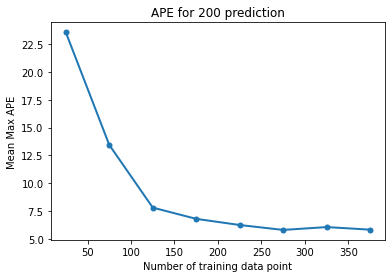

In [47]:
# y_Smoothspline = Smoothspline.ev(X_te[:,0],X_te[:,1])
# APE = (np.sqrt((((y_Smoothspline-y_te)/y_te)**2))).max()

APE = np.zeros(8)
p= 200
j = 0
for k in range(25,376,50):
  APE_tmp = 0.
  for i in range(1,6,1):
    X_tr,y_tr,X_te,y_te = data_prep(full_data,p,k)
    Smoothspline = scipy.interpolate.SmoothBivariateSpline(X_tr[:,0], X_tr[:,1], y_tr)
    y_Smoothspline = Smoothspline.ev(X_te[:,0],X_te[:,1])
    APE_tmp += (np.sqrt((((y_Smoothspline-y_te)/y_te)**2))).max()
    Smoothspline = []
  APE[j] = APE_tmp/5.
  j = j+1
print(APE)
import matplotlib.pyplot as plt
plt.plot(range(25,376,50),APE*100,'.-',linewidth=2,markersize=10)
plt.xlabel('Number of training data point')
plt.ylabel('Mean Max APE')
plt.title('APE for 200 prediction')

# plt.savefig('APE_spline.png',dpi=300)
# files.download('APE_spline.png') 



In [50]:
def plot_spline_3d(x_i,x_j,mean,x_1,x_2,y,X_tr,y_tr):
  fig = plt.figure(figsize=(14,6))
  ax1= fig.add_subplot(121,projection='3d')
  #show mean values
  ax1.plot_surface(x_i,x_j,mean.reshape(x_i.shape),cmap='copper',rstride=1,cstride=1,vmin=np.amin(mean),vmax=np.amax(mean),linewidth=0,antialiased='True',alpha=0.5)
  ax1.set_xlabel('E/Y')
  ax1.set_ylabel('Poisson ratio')
  ax1.set_zlabel('Modified K values')
  ax1.scatter(x_1,x_2,y,c='b',marker='.',label='Ground Truth')
  ax1.scatter(X_tr[:,0],X_tr[:,1],y_tr,c='r',marker='o',label='Train Truth')  
  plt.show()

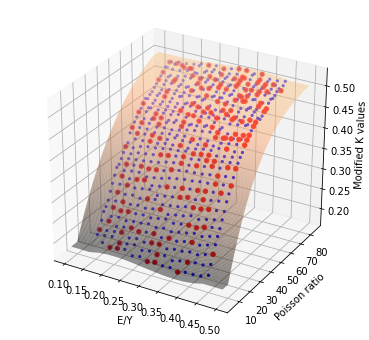

In [58]:
p = 200
k = 175
X_tr,y_tr,X_te,y_te = data_prep(full_data,p,k)
Smoothspline = scipy.interpolate.SmoothBivariateSpline(X_tr[:,0], X_tr[:,1], y_tr)

Y = np.arange(5, 85, 0.25) #E/Y
X = np.arange(0.1, 0.525, 0.025) #poisson ratio
X, Y = np.meshgrid(X, Y)

X_testing = np.vstack((np.ravel(X,order='F'),np.ravel(Y,order='F'))).T

mean = Smoothspline.ev(X_testing[:,0],X_testing[:,1])

x_i = X.T
x_j = Y.T
x_1 = full_data[0:,0]
x_2 = full_data[0:,1] 
y =full_data[0:,2]

plot_spline_3d(x_i,x_j,mean,x_1,x_2,y,X_tr,y_tr)